<a href="https://colab.research.google.com/github/Rogerio-mack/fNIRS/blob/main/fnirs_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing `mne-nirs` new version package

Algumas funcionalidades podem requerer instalar a versão mais nova, em desenvolvimento do pacote nme-nirs.

In [3]:
!pip install nilearn

In [4]:
#
# New, developing version
# 

!pip install -U --no-deps https://github.com/mne-tools/mne-python/archive/main.zip

#
# You must restart the runtime in order to use newly installed versions.
#

  Using cached https://github.com/mne-tools/mne-python/archive/main.zip


In [5]:
# Requirement already satisfied: mne-nirs in /usr/local/lib/python3.7/dist-packages (0.1.1)
# Requirement already satisfied: mne>=0.21.0 in /usr/local/lib/python3.7/dist-packages (from mne-nirs) (0.24.dev0)
# Requirement already satisfied: numpy>=1.11.3 in /usr/local/lib/python3.7/dist-packages (from mne-nirs) (1.19.5)
# Requirement already satisfied: scipy>=0.17.1 in /usr/local/lib/python3.7/dist-packages (from mne-nirs) (1.4.1)

!pip install mne-nirs

In [6]:
#
# Old, stabilished version
# 

# Successfully installed mne-0.23.4 mne-nirs-0.1.1
# !pip install mne-nirs

# Mount Google Drive

Para acesso aos arquivos compartilhados. Tenha certeza de ter adicionado a pasta compartilhada ao seu Google Drive antes.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Common Imports

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import compress

import mne

# Read `snirf` file

`nme-nirs` suporta dentre outros arquivos: 

```
read_raw_boxy
read_raw_brainvision
read_raw_nirx
read_raw_snirf
```

Mas não suporta arquivos `.nirs`. 



# **TO DO**

> * Verificar a possibilidade de empregar arquivos `read_raw_brainvision` diretamente
> * Verificar a possibilidade de conversão de arquivos dos diferentes formatos, em especial `read_raw_.nirs` $\leftrightarrow$ `read_raw_.snirf` $\leftrightarrow$  `read_raw_brainvision` 


In [9]:
for method in dir(mne.io):
  if 'read_raw' in method:
    print(method)

_read_raw
read_raw
read_raw_artemis123
read_raw_bdf
read_raw_boxy
read_raw_brainvision
read_raw_bti
read_raw_cnt
read_raw_ctf
read_raw_curry
read_raw_edf
read_raw_eeglab
read_raw_egi
read_raw_eximia
read_raw_fieldtrip
read_raw_fif
read_raw_gdf
read_raw_hitachi
read_raw_kit
read_raw_nedf
read_raw_nicolet
read_raw_nihon
read_raw_nirx
read_raw_persyst
read_raw_snirf


## Read `.snirf` data

In [14]:
raw_intensity = mne.io.read_raw_snirf('/content/drive/MyDrive/fNIRS - análises compartilhadas/DadosOutroGrupo/2019-02-14_001.snirf', verbose=True)

raw_intensity.load_data()

Loading /content/drive/MyDrive/fNIRS - análises compartilhadas/DadosOutroGrupo/2019-02-14_001.snirf
Reading 0 ... 2214  =      0.000 ...   217.636 secs...


<RawSNIRF | 2019-02-14_001.snirf, 96 x 2215 (217.6 s), ~1.8 MB, data loaded>

## Convert to Dataframe

Isso é útil para trabalhar com os dados de forma tabular.

In [15]:
df = raw_intensity.to_data_frame()

In [16]:
df.head()

,time,S1_D1 760,S1_D1 850,S1_D3 760,S1_D3 850,S2_D1 760,S2_D1 850,S2_D2 760,S2_D2 850,S2_D4 760,S2_D4 850,S3_D1 760,S3_D1 850,S3_D3 760,S3_D3 850,S3_D4 760,S3_D4 850,S3_D5 760,S3_D5 850,S4_D2 760,S4_D2 850,S4_D4 760,S4_D4 850,S4_D6 760,S4_D6 850,S5_D3 760,S5_D3 850,S5_D5 760,S5_D5 850,S5_D7 760,S5_D7 850,S6_D4 760,S6_D4 850,S6_D5 760,S6_D5 850,S6_D6 760,S6_D6 850,S6_D8 760,S6_D8 850,S7_D5 760,...,S10_D12 760,S10_D12 850,S11_D9 760,S11_D9 850,S11_D11 760,S11_D11 850,S11_D13 760,S11_D13 850,S12_D10 760,S12_D10 850,S12_D11 760,S12_D11 850,S12_D12 760,S12_D12 850,S12_D14 760,S12_D14 850,S13_D11 760,S13_D11 850,S13_D13 760,S13_D13 850,S13_D14 760,S13_D14 850,S13_D15 760,S13_D15 850,S14_D12 760,S14_D12 850,S14_D14 760,S14_D14 850,S14_D16 760,S14_D16 850,S15_D13 760,S15_D13 850,S15_D15 760,S15_D15 850,S16_D14 760,S16_D14 850,S16_D15 760,S16_D15 850,S16_D16 760,S16_D16 850
0,0,0.044097,0.055626,0.615258,0.736574,0.098321,0.152116,0.112808,0.133503,0.214840,0.252415,0.234420,0.368304,0.212858,0.311692,0.218613,0.261921,0.320218,0.413299,0.222010,0.346595,0.137800,0.217794,0.236877,0.365706,0.535284,0.775713,0.058048,0.070828,0.374340,0.423875,0.127498,0.191274,0.136712,0.209583,0.163032,0.251485,0.175233,0.244995,0.470840,...,0.222366,0.300787,0.667761,0.655144,0.116790,0.130070,0.674769,0.782516,0.110166,0.158905,0.316613,0.517755,0.121872,0.167215,0.258300,0.350519,0.413092,0.581172,0.435997,0.636833,0.251111,0.302242,0.556791,0.745649,0.290565,0.393526,0.187339,0.254741,0.440310,0.528109,0.679316,0.776364,0.160006,0.161222,0.292135,0.426979,0.218950,0.343492,0.146392,0.199776
1,98,0.044212,0.055869,0.616682,0.739118,0.098540,0.152493,0.113142,0.134119,0.215717,0.253880,0.234777,0.369021,0.213315,0.312661,0.219341,0.262972,0.320786,0.414220,0.222517,0.347375,0.138378,0.218889,0.237644,0.366947,0.536256,0.777545,0.058140,0.071093,0.375382,0.425491,0.128212,0.192781,0.136979,0.210274,0.163471,0.252608,0.175738,0.245992,0.471507,...,0.223193,0.302293,0.669529,0.657978,0.117082,0.130606,0.676079,0.785034,0.110515,0.159757,0.317175,0.519453,0.122364,0.168172,0.259086,0.352173,0.414010,0.582863,0.437027,0.638912,0.251550,0.303062,0.557735,0.747568,0.290831,0.394266,0.187703,0.255528,0.441262,0.530124,0.680810,0.778915,0.160322,0.161718,0.292577,0.427980,0.219197,0.344117,0.146629,0.200421
2,197,0.044271,0.055997,0.617295,0.740186,0.098624,0.152634,0.113405,0.134423,0.215814,0.253970,0.234566,0.368727,0.212953,0.312065,0.218255,0.261344,0.320194,0.413089,0.222509,0.347232,0.137543,0.216837,0.236576,0.364509,0.535217,0.775504,0.057866,0.070646,0.373594,0.423169,0.125948,0.187924,0.135946,0.207914,0.162202,0.249522,0.175148,0.244187,0.469286,...,0.220573,0.297180,0.664236,0.650241,0.116111,0.128949,0.672687,0.778694,0.109001,0.156427,0.314692,0.513262,0.120422,0.164033,0.256042,0.345472,0.411006,0.575616,0.433472,0.630977,0.249228,0.298725,0.553865,0.739183,0.288322,0.388243,0.185325,0.250630,0.436153,0.520442,0.674914,0.768345,0.159035,0.159491,0.289154,0.419848,0.216830,0.338418,0.144632,0.196090
3,295,0.043814,0.055051,0.611623,0.729825,0.097704,0.150504,0.112155,0.132092,0.211949,0.247225,0.232984,0.364409,0.211175,0.307516,0.215045,0.255455,0.318104,0.408452,0.220587,0.342518,0.135726,0.212598,0.234671,0.359618,0.532662,0.769599,0.057575,0.070003,0.371820,0.420112,0.124454,0.184646,0.135007,0.205737,0.161281,0.246747,0.173892,0.241770,0.467571,...,0.219397,0.294448,0.661922,0.646235,0.115765,0.128073,0.670743,0.774209,0.108400,0.155364,0.313541,0.509984,0.119762,0.162307,0.254960,0.342780,0.409832,0.572589,0.431986,0.627006,0.248619,0.297119,0.552290,0.735387,0.288223,0.386642,0.184979,0.249185,0.434673,0.516990,0.672790,0.764334,0.158545,0.158593,0.288478,0.417627,0.216247,0.336532,0.144237,0.194952
4,393,0.043709,0.054718,0.610273,0.727164,0.097528,0.149763,0.111708,0.131216,0.211354,0.245955,0.232710,0.363115,0.210963,0.306506,0.214923,0.254806,0.317711,0.407232,0.220062,0.341136,0.135862,0.212389,0.234959,0.359079,0.532543,0.768541,0

## Inspeção inicial dos Dados

In [18]:
print('\nNúmero de Canais:'.ljust(30), df.shape[1] - 1)

max_measure = df.iloc[0::,1::].max().max()
min_measure = df.iloc[0::,1::].min().min()
print('\nIntervalo das medidas:'.ljust(30), min_measure, max_measure)

print('\nCanais por prefixo:'.ljust(30))
list_prefix_channels = [x[0:x.find('_')] for x in df.columns[1::]]
summary_prefix_channels = {}
summary_prefix_channels_list = {}
for c in list_prefix_channels:
  if c not in summary_prefix_channels.keys():  
    summary_prefix_channels[c] = list_prefix_channels.count(c)
    summary_prefix_channels_list[c] = [x for x in df.columns[1::] if c+'_' in x]

for c in summary_prefix_channels.keys():  
    print(29*' ',c, summary_prefix_channels[c], summary_prefix_channels_list[c])

print('\nCanais por sufixo:'.ljust(30))
list_suffix_channels = [x[x.find(' ')+1::] for x in df.columns[1::]]
summary_suffix_channels = {}
for c in list_suffix_channels:
  if c not in summary_suffix_channels.keys():  
    summary_suffix_channels[c] = list_suffix_channels.count(c)
    print(29*' ',c, summary_suffix_channels[c])
  
print('\nTimes:'.ljust(30), df.shape[0])

print('\nElapse times:'.ljust(30))
for i in range(len(df.time.diff()[1::].value_counts())):
  print(29*' ', df.time.diff()[1::].value_counts().index[i], df.time.diff()[1::].value_counts().values[i])




Número de Canais:             96

Intervalo das medidas:        0.04360839 0.827616

Canais por prefixo:          
                              S1 4 ['S1_D1 760', 'S1_D1 850', 'S1_D3 760', 'S1_D3 850']
                              S2 6 ['S2_D1 760', 'S2_D1 850', 'S2_D2 760', 'S2_D2 850', 'S2_D4 760', 'S2_D4 850']
                              S3 8 ['S3_D1 760', 'S3_D1 850', 'S3_D3 760', 'S3_D3 850', 'S3_D4 760', 'S3_D4 850', 'S3_D5 760', 'S3_D5 850']
                              S4 6 ['S4_D2 760', 'S4_D2 850', 'S4_D4 760', 'S4_D4 850', 'S4_D6 760', 'S4_D6 850']
                              S5 6 ['S5_D3 760', 'S5_D3 850', 'S5_D5 760', 'S5_D5 850', 'S5_D7 760', 'S5_D7 850']
                              S6 8 ['S6_D4 760', 'S6_D4 850', 'S6_D5 760', 'S6_D5 850', 'S6_D6 760', 'S6_D6 850', 'S6_D8 760', 'S6_D8 850']
                              S7 6 ['S7_D5 760', 'S7_D5 850', 'S7_D7 760', 'S7_D7 850', 'S7_D8 760', 'S7_D8 850']
                              S8 4 ['S8_D6 760', 'S8_D6 850'

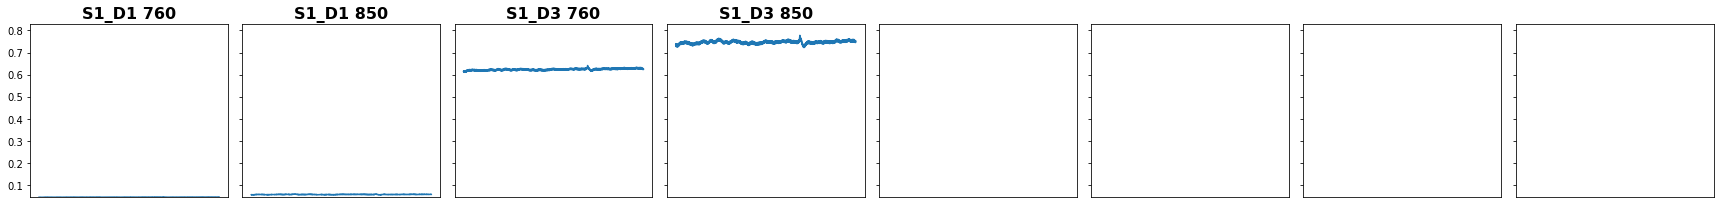

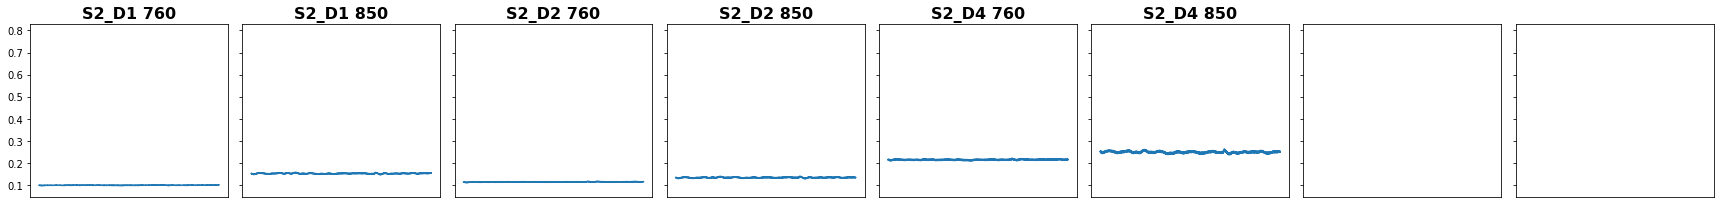

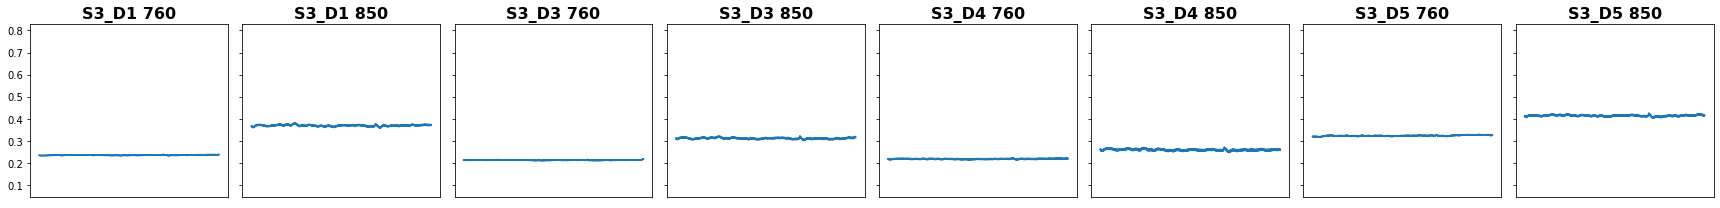

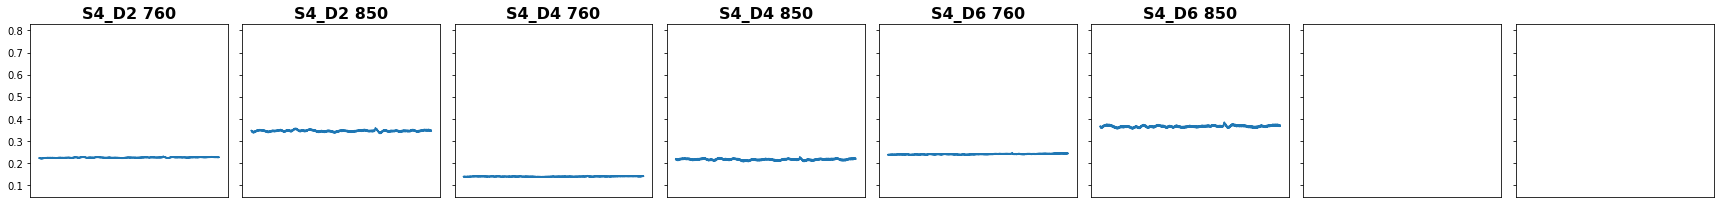

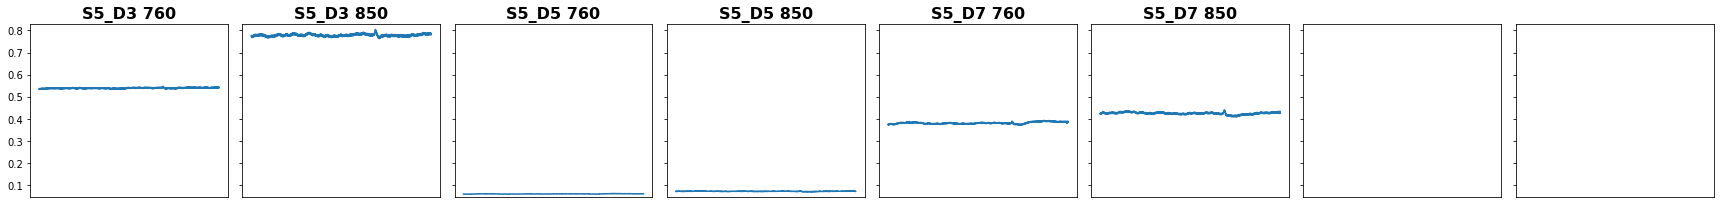

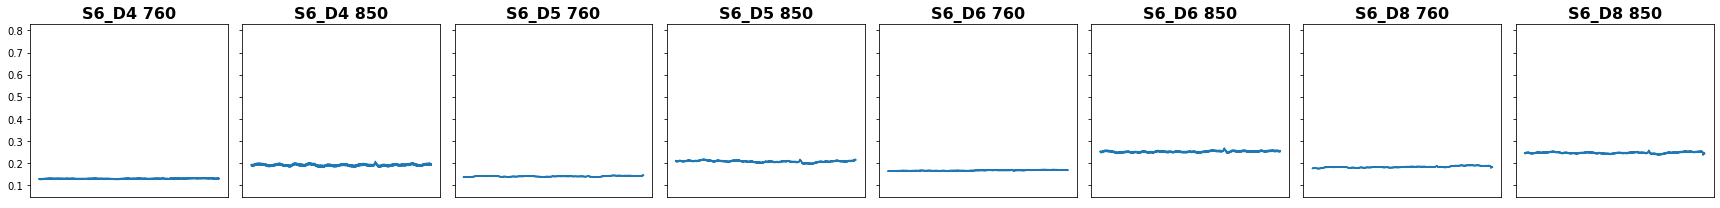

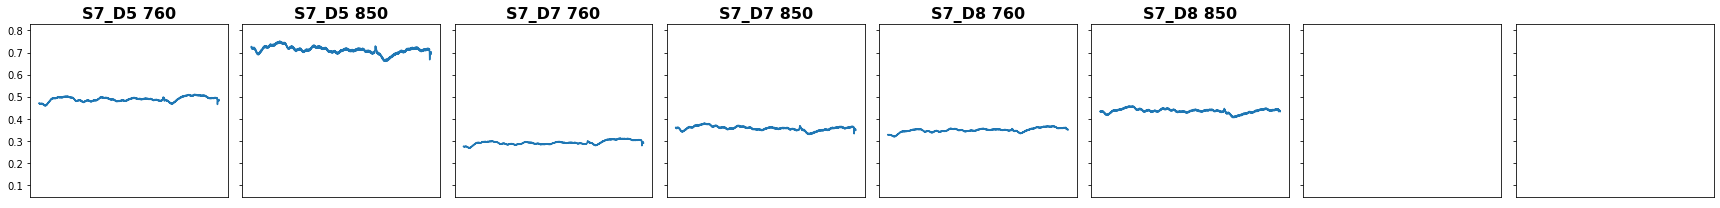

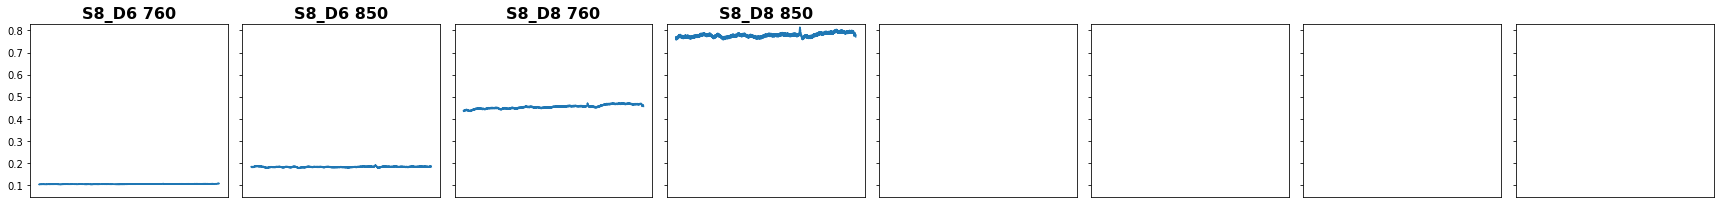

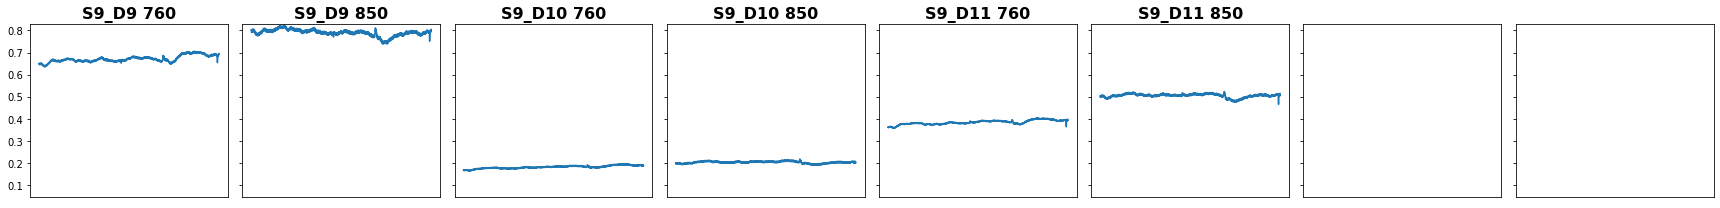

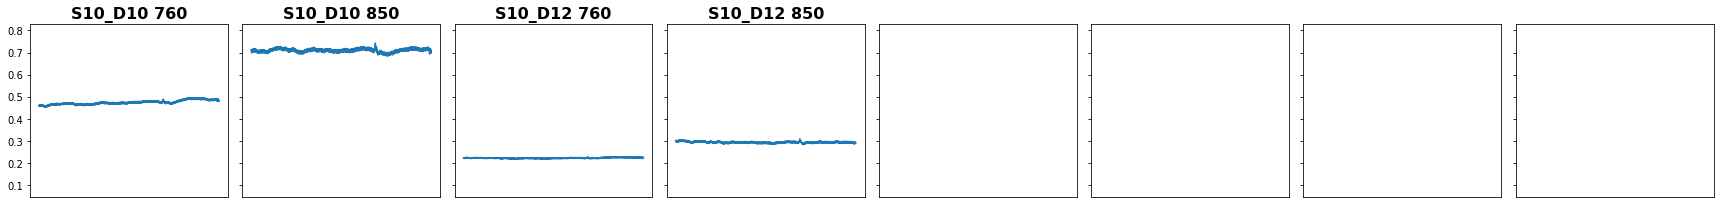

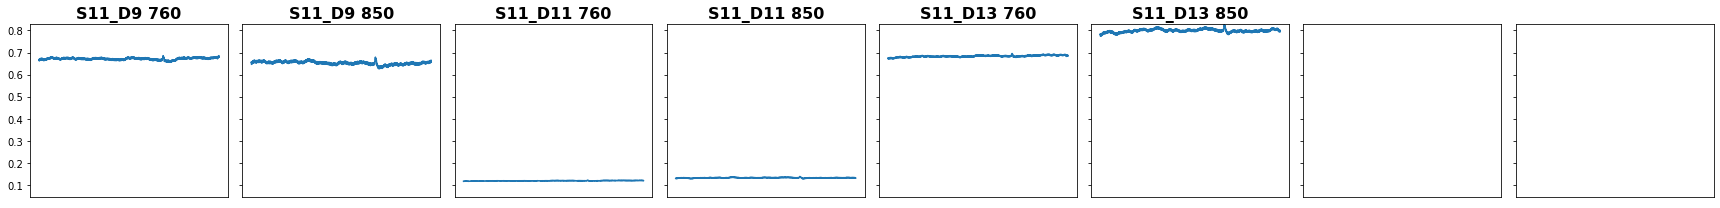

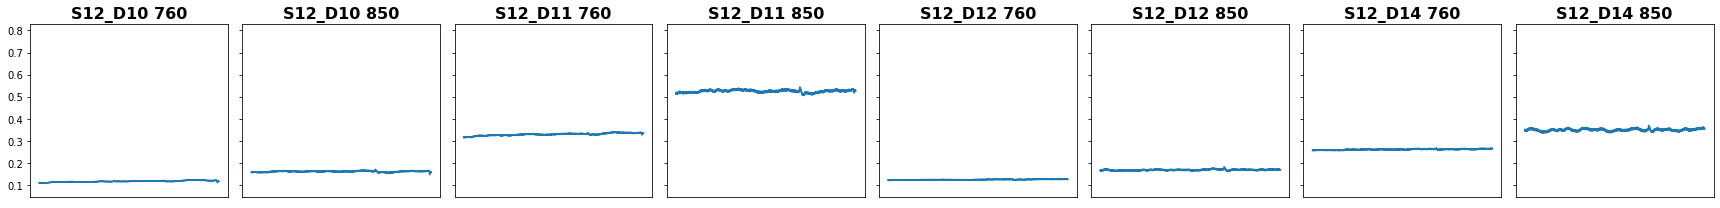

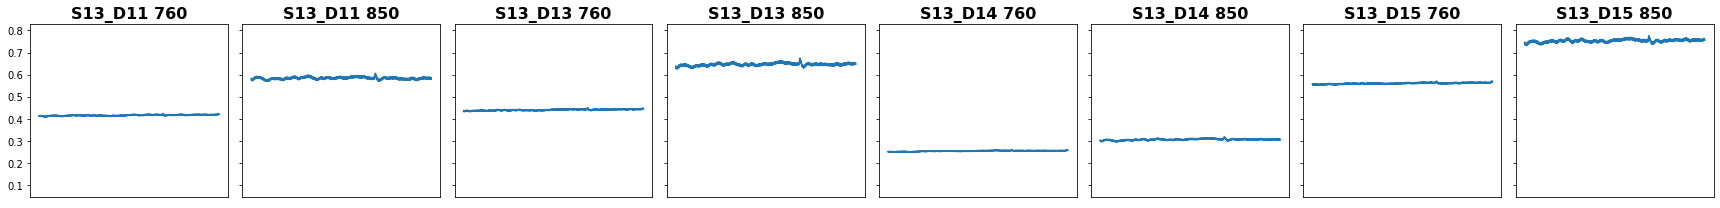

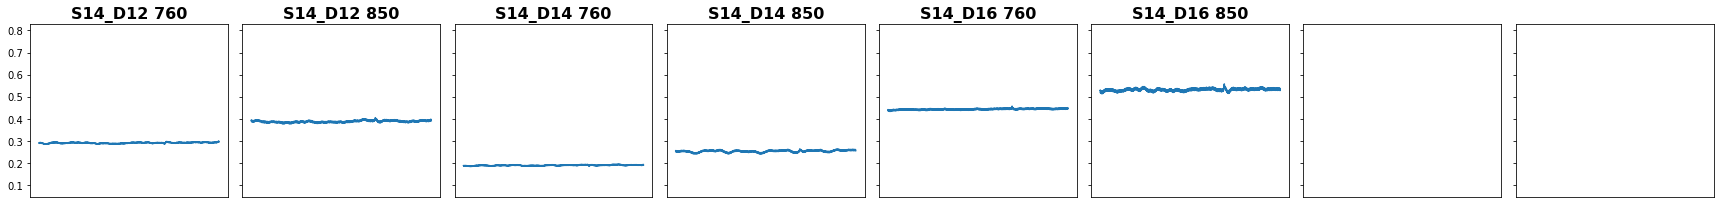

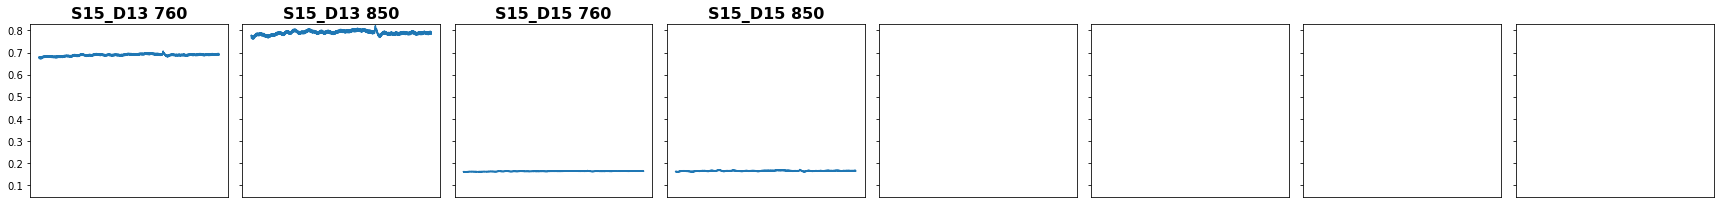

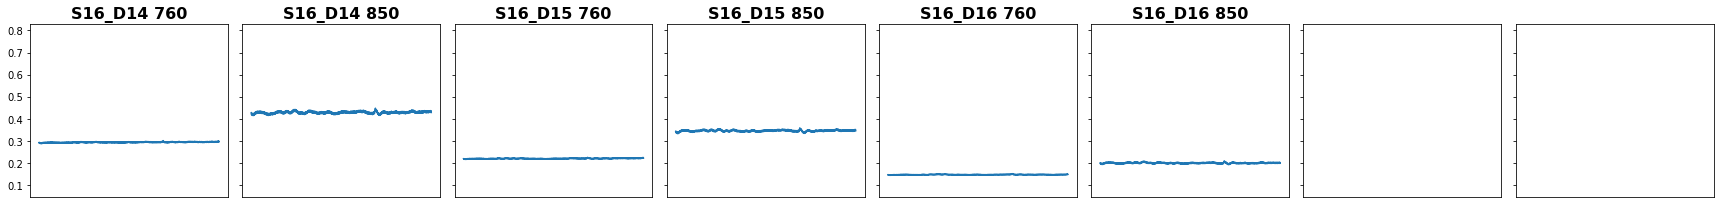

In [19]:
for s in summary_prefix_channels.keys(): 
  fig, ax = plt.subplots(nrows=1, ncols=8, sharex=True, sharey=True,figsize=(24,3))
  i = 0
  for c in summary_prefix_channels_list[s]:
    ax[i].plot(df.index, df[c])
    ax[i].set_title(c, fontsize=16, weight='bold')
    i = i + 1
    plt.xticks([])
    plt.ylim([min_measure, max_measure])
 
  plt.tight_layout()
  plt.show()


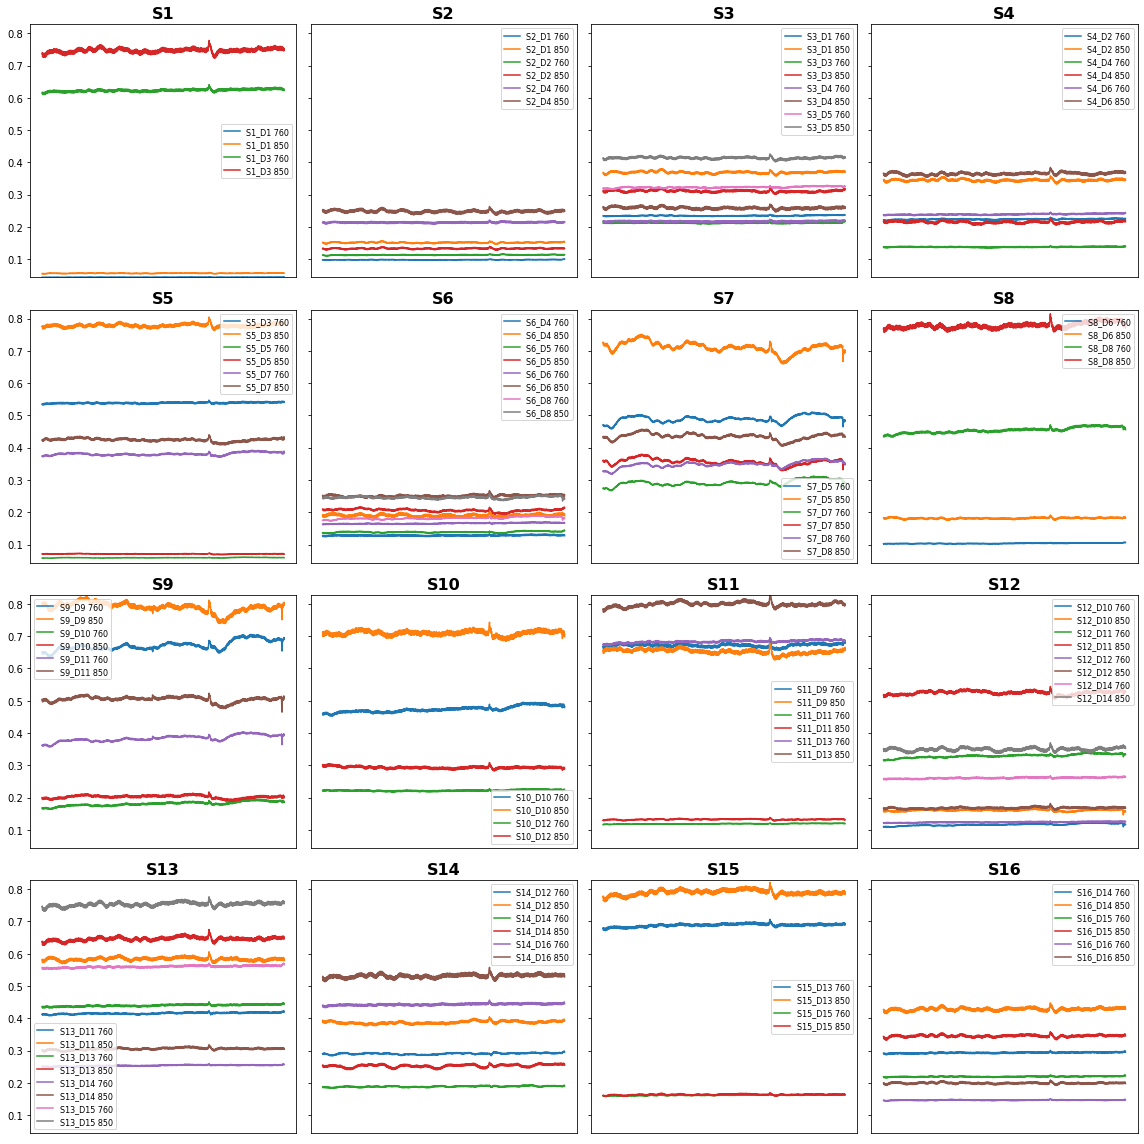

In [25]:
colunas = 4
linhas = int( len( summary_prefix_channels.keys() ) / colunas )

fig, ax = plt.subplots(nrows=linhas, ncols=colunas, sharex=True, sharey=True,figsize=(4*linhas,4*colunas))
i = 0
for s in summary_prefix_channels.keys(): 
  for c in summary_prefix_channels_list[s]:
    ax[i//colunas, i%colunas].plot(df.index, df[c], label=c)
  ax[i//colunas, i%colunas].set_title(s, fontsize=16, weight='bold')
  ax[i//colunas, i%colunas].legend(fontsize=8)
  plt.xticks([])
  plt.ylim([min_measure, max_measure])
  i = i + 1 
  
plt.tight_layout()
plt.show()

In [31]:
c

'S1_D1 760'

{'boxes': [<matplotlib.lines.Line2D at 0x7fa079612710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa0795f9810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa079610850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa079610310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa079612d50>,
  <matplotlib.lines.Line2D at 0x7fa079612e90>]}

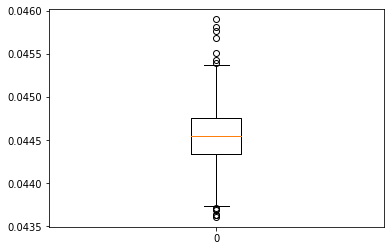

In [36]:
plt.boxplot(df[c], positions=[0] )

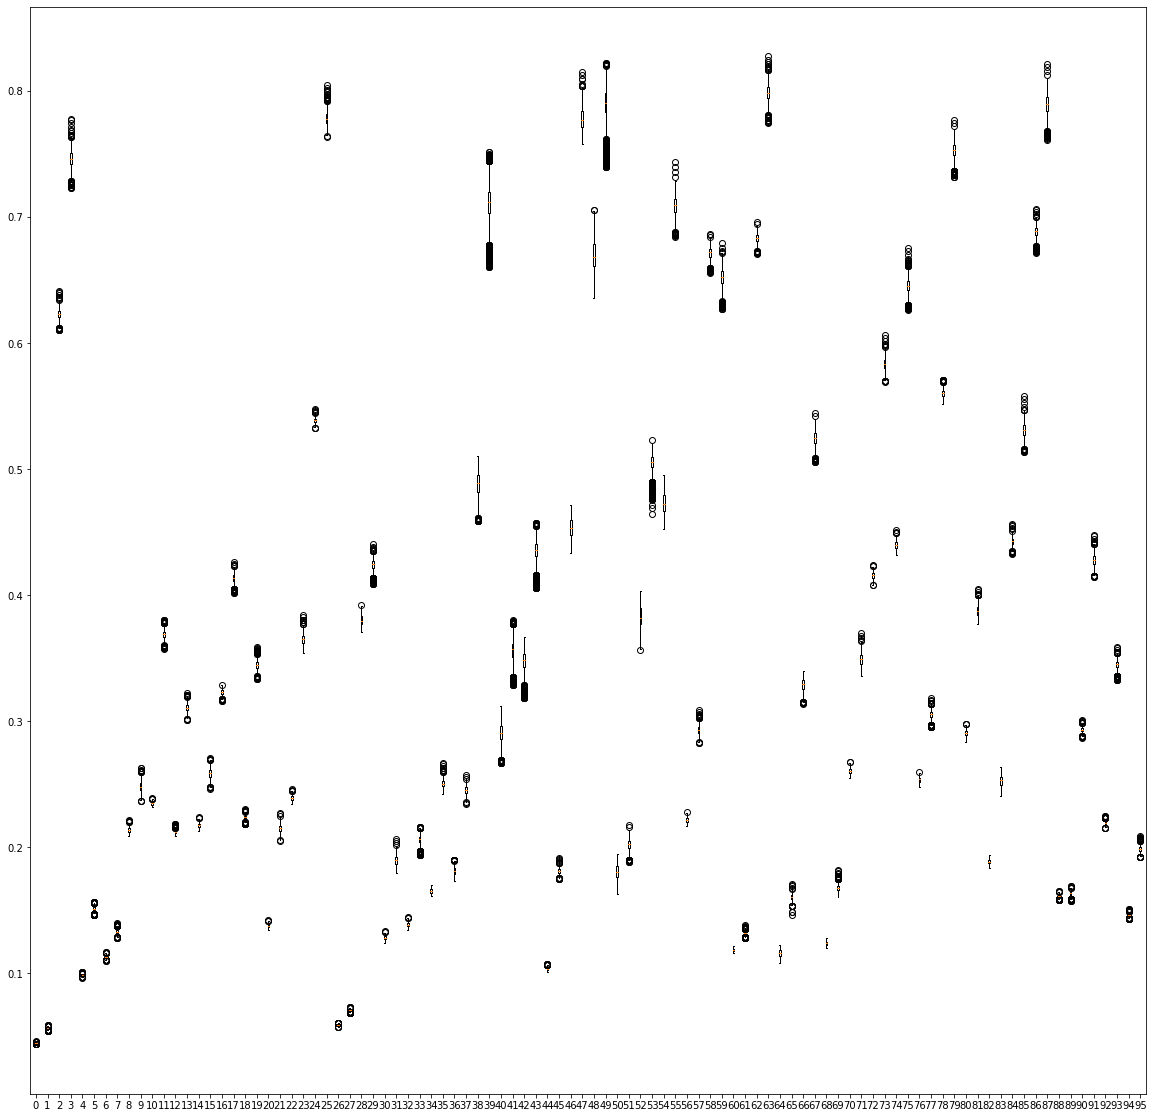

In [38]:
# fig, ax = plt.subplots(nrows=linhas, ncols=colunas, sharex=True, sharey=True,figsize=(4*linhas,4*colunas))
plt.figure(figsize=(20,20))
i = 0
for s in summary_prefix_channels.keys(): 
  for c in summary_prefix_channels_list[s]:
    plt.boxplot(df[c], positions=[i])
    i = i + 1

plt.show()

In [26]:
for i in range(len(raw_intensity.annotations)):
  print(raw_intensity.annotations[i])

OrderedDict([('onset', 13.76256), ('duration', 1.0), ('description', '1'), ('orig_time', datetime.datetime(2021, 10, 23, 11, 10, 53, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 13.76256), ('duration', 1.0), ('description', '1'), ('orig_time', datetime.datetime(2021, 10, 23, 11, 10, 53, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 33.816576), ('duration', 1.0), ('description', '2'), ('orig_time', datetime.datetime(2021, 10, 23, 11, 10, 53, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 33.816576), ('duration', 1.0), ('description', '2'), ('orig_time', datetime.datetime(2021, 10, 23, 11, 10, 53, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 53.772288), ('duration', 1.0), ('description', '1'), ('orig_time', datetime.datetime(2021, 10, 23, 11, 10, 53, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 53.772288), ('duration', 1.0), ('description', '1'), ('orig_time', datetime.datetime(2021, 10, 23, 11, 10, 53, tzinfo=datetime.timezone.utc))])


In [27]:
raw_intensity.ch_names

['S1_D1 760',
 'S1_D1 850',
 'S1_D3 760',
 'S1_D3 850',
 'S2_D1 760',
 'S2_D1 850',
 'S2_D2 760',
 'S2_D2 850',
 'S2_D4 760',
 'S2_D4 850',
 'S3_D1 760',
 'S3_D1 850',
 'S3_D3 760',
 'S3_D3 850',
 'S3_D4 760',
 'S3_D4 850',
 'S3_D5 760',
 'S3_D5 850',
 'S4_D2 760',
 'S4_D2 850',
 'S4_D4 760',
 'S4_D4 850',
 'S4_D6 760',
 'S4_D6 850',
 'S5_D3 760',
 'S5_D3 850',
 'S5_D5 760',
 'S5_D5 850',
 'S5_D7 760',
 'S5_D7 850',
 'S6_D4 760',
 'S6_D4 850',
 'S6_D5 760',
 'S6_D5 850',
 'S6_D6 760',
 'S6_D6 850',
 'S6_D8 760',
 'S6_D8 850',
 'S7_D5 760',
 'S7_D5 850',
 'S7_D7 760',
 'S7_D7 850',
 'S7_D8 760',
 'S7_D8 850',
 'S8_D6 760',
 'S8_D6 850',
 'S8_D8 760',
 'S8_D8 850',
 'S9_D9 760',
 'S9_D9 850',
 'S9_D10 760',
 'S9_D10 850',
 'S9_D11 760',
 'S9_D11 850',
 'S10_D10 760',
 'S10_D10 850',
 'S10_D12 760',
 'S10_D12 850',
 'S11_D9 760',
 'S11_D9 850',
 'S11_D11 760',
 'S11_D11 850',
 'S11_D13 760',
 'S11_D13 850',
 'S12_D10 760',
 'S12_D10 850',
 'S12_D11 760',
 'S12_D11 850',
 'S12_D12 760',
 '

In [28]:
raw_intensity.get_channel_types()

['fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_amplitude',
 'fnirs_cw_

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("R.matlab")

In [ ]:
%%R
library(R.matlab)

# load the nirs file
data <- readMat("/content/ana.nirs")

# get the available names
names(data)

# format description:
# http://www.nmr.mgh.harvard.edu/martinos/software/homer/HOMER2_UsersGuide_121129.pdf#4

# find the dimensions of data: samples and channels
dim(data$d)

# number of channels
ncol(data$d)

# create a custom plotting function
myPlot <- function(y){
  plot(data$t, y,
       type = "l",
       xlab = "Time", ylab = "Intensity",
       ylim = c(range(data$d)),
       main = paste("Channel ", toString(y)))
  # add the lines when triggers occur
  lines(data$t, data$s*1500, # multiply the trigger value to make it visible
        type = "l", xlab = "Time", col = "red")
}

# apply the plotting function to all channels
apply(data$d[, 1:ncol(data$d)], 2, myPlot)

sessionInfo()

In [ ]:
%%R
str(data)